In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 24.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/data visualization/data/craigslistVehicles.csv'
base = '/content/drive/My Drive/Colab Notebooks/data visualization/data/'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb # Pcakge used to do statistical visualization
import os

In [4]:
dat = pd.read_csv(pwd)
dat.head(10)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,lat,long
0,https://tricities.craigslist.org/cto/d/1978-br...,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00r0r_eGnnFC1JNm...,37.132840,-95.785580
1,https://tricities.craigslist.org/cto/d/2008-bu...,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6 cylinders,gas,51000.0,clean,automatic,NaN,fwd,full-size,sedan,grey,https://images.craigslist.org/00N0N_1LSHqLESW9...,35.777999,-83.612533
2,https://tricities.craigslist.org/cto/d/2006-po...,tricities,13500,2006.0,NaN,Pont GTO,excellent,8 cylinders,gas,93000.0,clean,automatic,NaN,rwd,mid-size,coupe,red,https://images.craigslist.org/00Y0Y_4cbEgS4prY...,36.333900,-82.340800
3,https://tricities.craigslist.org/cto/d/2006-me...,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00T0T_fGLx4Ltazq...,36.000092,-84.018302
4,https://tricities.craigslist.org/cto/d/2016-fo...,tricities,37900,2016.0,ford,f350,excellent,8 cylinders,diesel,70500.0,clean,automatic,NaN,4wd,NaN,truck,white,https://images.craigslist.org/00k0k_ls78o6lwVq...,36.272932,-82.537537
5,https://tricities.craigslist.org/cto/d/jeep-wr...,tricities,7900,2000.0,NaN,Wrangler TJ,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,NaN,SUV,red,https://images.craigslist.org/00u0u_jHAD7SbuFt...,36.399600,-82.452300
6,https://tricities.craigslist.org/cto/d/1992-me...,tricities,1200,1992.0,mercedes-benz,benz,NaN,NaN,gas,194000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_dzlLW9ZPKY...,36.416200,-83.010800
7,https://tricities.craigslist.org/cto/d/2003-ch...,tricities,5000,2003.0,chevrolet,silverado,like new,8 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00L0L_4l6UhUL3qX...,36.344500,-82.201500
8,https://tricities.craigslist.org/ctd/d/2010-ni...,tricities,9950,2010.0,nissan,armada,excellent,8 cylinders,gas,155244.0,clean,automatic,5N1AA0NC7AN602236,4wd,full-size,SUV,black,https://images.craigslist.org/00n0n_gOocwNdHG0...,37.286501,-80.056719
9,https://tricities.craigslist.org/ctd/d/2003-fo...,tricities,5950,2003.0,ford,expedition,excellent,8 cylinders,gas,141602.0,clean,automatic,1FMFU18L73LC08586,4wd,full-size,SUV,green,https://images.craigslist.org/00V0V_darIoRE1z1...,37.286501,-80.056719


In [0]:
# Function used to print out the missing value information in a dataframe
def missing_num(dat):
    print('total rows number: ',len(dat))
    print('total rows contain NaN: ',dat.isnull().T.any().T.sum())
    col_names = list(dat.columns.values)
    for name in col_names:
        print('total number of NaN in the column ',name,' : ',dat[name].isnull().sum())

In [6]:
missing_num(dat)

total rows number:  677812
total rows contain NaN:  620238
total number of NaN in the column  url  :  0
total number of NaN in the column  city  :  0
total number of NaN in the column  price  :  0
total number of NaN in the column  year  :  298
total number of NaN in the column  manufacturer  :  53598
total number of NaN in the column  make  :  27493
total number of NaN in the column  condition  :  279990
total number of NaN in the column  cylinders  :  276231
total number of NaN in the column  fuel  :  7778
total number of NaN in the column  odometer  :  224562
total number of NaN in the column  title_status  :  4533
total number of NaN in the column  transmission  :  7130
total number of NaN in the column  VIN  :  437447
total number of NaN in the column  drive  :  262699
total number of NaN in the column  size  :  446310
total number of NaN in the column  type  :  278953
total number of NaN in the column  paint_color  :  275278
total number of NaN in the column  image_url  :  58
tot

**Data Cleaning**

In [7]:
year_range = dat['year'].value_counts().index
print('The earliest Manufacturer year is %d and the The latest Manufacurer year is %d' %(int(min(year_range)),int(max(year_range))))

The earliest Manufacturer year is 1900 and the The latest Manufacurer year is 2019


Only focus on the vehicles manufactured after 2000 and remove the vehicles without a manufacture year.

Also remove the 2019 record because we don't have the 2019 just started and we don't have the month data.

Also, rmove the rows with the missing values in odometer.

In [8]:
dat.drop(dat[dat.year < 2001].index, inplace = True)
dat.drop(dat[dat.year == 2019].index, inplace = True)
dat.drop(dat[dat.year.isnull()].index, inplace = True)
dat.drop(dat[dat.odometer.isnull()].index, inplace = True)
missing_num(dat)

total rows number:  393618
total rows contain NaN:  342178
total number of NaN in the column  url  :  0
total number of NaN in the column  city  :  0
total number of NaN in the column  price  :  0
total number of NaN in the column  year  :  0
total number of NaN in the column  manufacturer  :  16449
total number of NaN in the column  make  :  6997
total number of NaN in the column  condition  :  137324
total number of NaN in the column  cylinders  :  122619
total number of NaN in the column  fuel  :  3304
total number of NaN in the column  odometer  :  0
total number of NaN in the column  title_status  :  386
total number of NaN in the column  transmission  :  2635
total number of NaN in the column  VIN  :  180691
total number of NaN in the column  drive  :  99738
total number of NaN in the column  size  :  238806
total number of NaN in the column  type  :  100129
total number of NaN in the column  paint_color  :  108260
total number of NaN in the column  image_url  :  0
total number o

In [0]:
def count_plot(dat,col_name,ax_i,sort=False,font_size=6):
  if sort:
      ax = sb.countplot(x=col_name,data=dat,order=dat[col_name].value_counts().index.sort_values(),ax=ax_i)
  else:
      ax = sb.countplot(x=col_name,data=dat,order=dat[col_name].value_counts(),ax=ax_i)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=font_size)
  ax.set_title('Number of vechicles posted count plot by '+col_name)

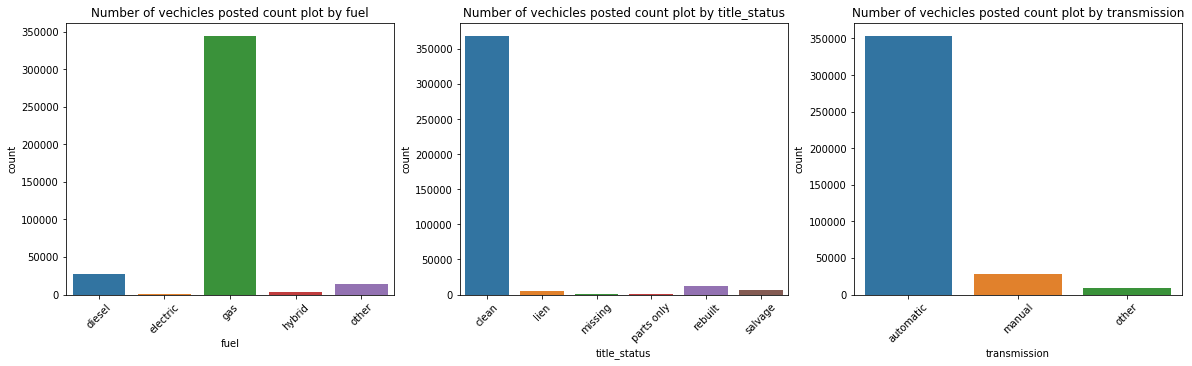

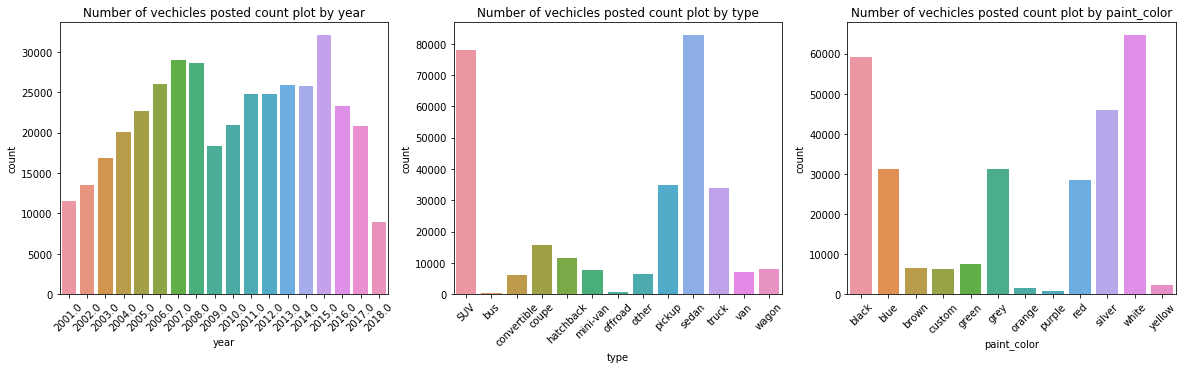

In [19]:
#
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
count_plot(dat,'fuel',ax1,True,10)
count_plot(dat,'title_status',ax2,True,10)
count_plot(dat,'transmission',ax3,True,10)
plt.show()
#
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
count_plot(dat,'year',ax1,True,10) # Count plot by year
count_plot(dat,'type',ax2,True,10) # Count plot by vehicles type
count_plot(dat,'paint_color',ax3,True,10) # Count plot by vehicles paint_color
plt.show()

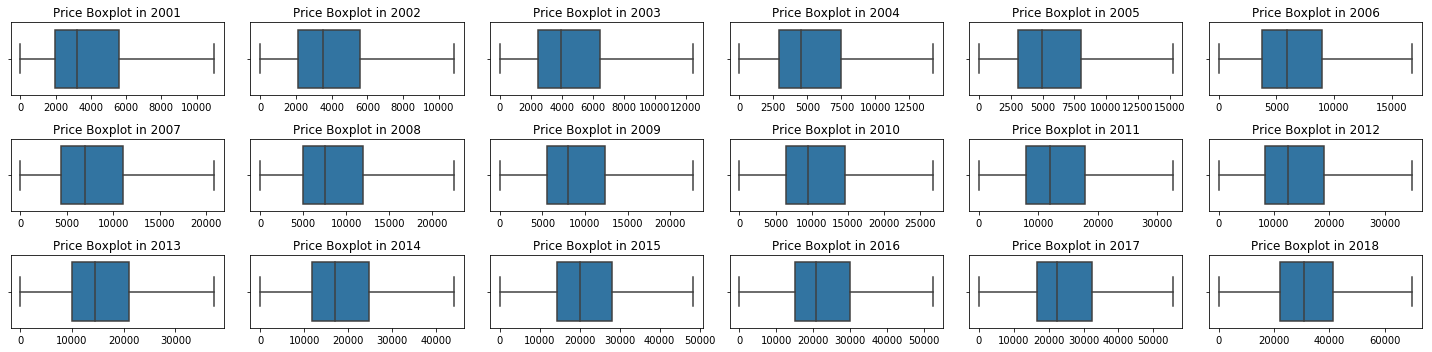

In [12]:
years = dat.year.value_counts().index
years = np.sort(years)
x = dat['price']
y = dat['year']
fig = plt.figure(figsize=(20,5))
for i in range(18):
    ax = fig.add_subplot(3,6,i+1)
    a = sb.boxplot(x[y==years[i]].values,showfliers=False,ax=ax)
    a.set_title('Price Boxplot in %d' %int(years[i]))
    plt.tight_layout()
plt.show()

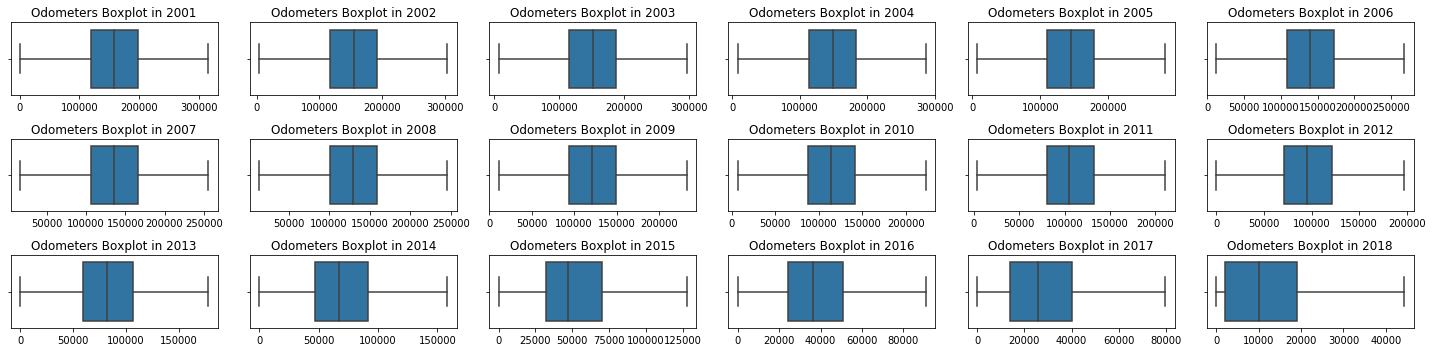

In [14]:
x = dat['odometer']
y = dat['year']
fig = plt.figure(figsize=(20,5))
for i in range(18):
    ax = fig.add_subplot(3,6,i+1)
    a = sb.boxplot(x[y==years[i]].values,showfliers=False,ax=ax)
    a.set_title('Odometers Boxplot in %d' %int(years[i]))
    plt.tight_layout()
plt.show()

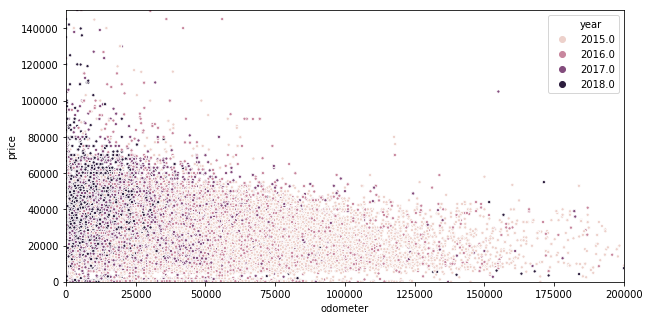

In [21]:
fig = plt.figure(figsize=(10,5))
a = fig.add_subplot(111)
dat1 = dat.drop(dat[dat.year < 2015].index)
ax = sb.scatterplot(x='odometer', y='price', hue='year',data=dat1,s=10,ax=a)
ax.set(ylim=(0, 150000))
ax.set(xlim=(0, 200000))
plt.show()

Total Number of Extremly Expensive Vehicles is 501


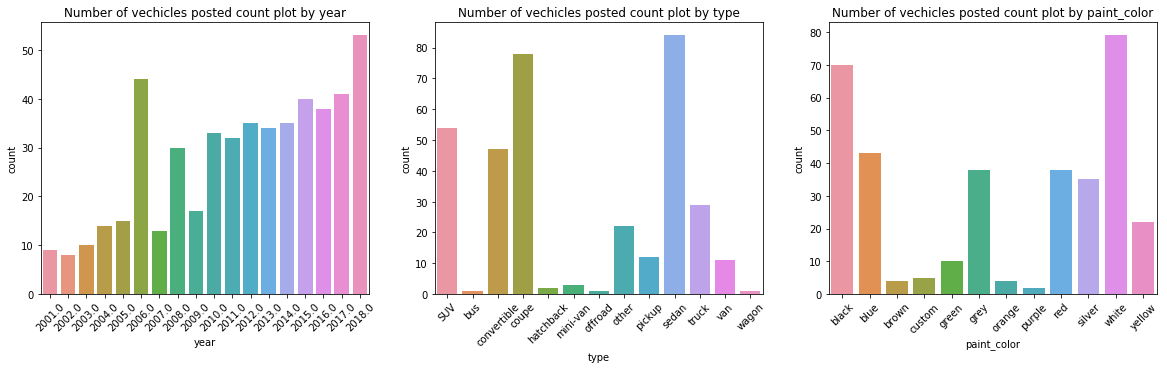

In [23]:
extr_expen = dat.drop(dat[dat.price < 100000].index)
print('Total Number of Extremly Expensive Vehicles is %d' %(len(extr_expen)))
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
count_plot(extr_expen,'year',ax1,True,10) # Count plot by year
count_plot(extr_expen,'type',ax2,True,10) # Count plot by vehicles type
count_plot(extr_expen,'paint_color',ax3,True,10) # Count plot by vehicles paint_color
plt.show()

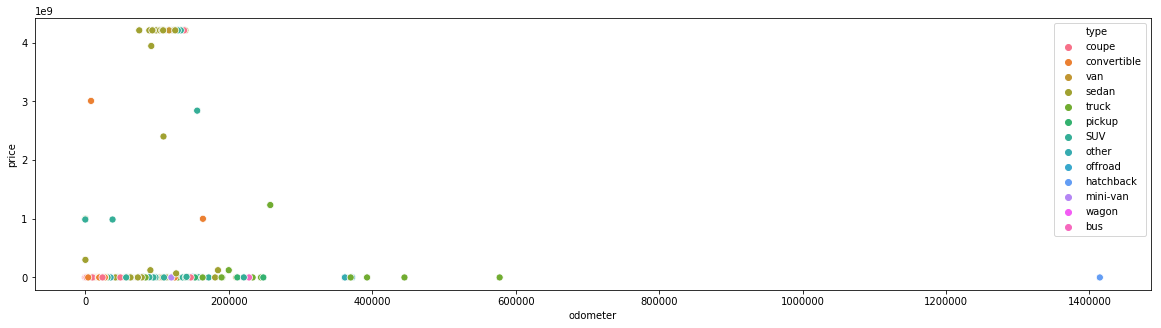

In [36]:
fig = plt.figure(figsize=(20,5))
a = fig.add_subplot(111)
sb.scatterplot(x='odometer', y='price', hue='type',data=extr_expen,s=50,ax=a)
plt.show()